In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skimage
from skimage import data, feature, transform, color
from skimage.transform import rotate
from skimage.feature import SIFT, ORB, BRIEF, match_descriptors, peak

In [3]:
img1 = plt.imread('persona1.jpg')
img1_gray = color.rgb2gray(img1)
img1_rot = rotate(img1_gray, 45)

In [4]:
modelo = BRIEF(patch_size=128)

brief_keypoints = peak.peak_local_max(img1_gray, min_distance=40)
brief_keypoints_rot = peak.peak_local_max(img1_rot, min_distance=40)

modelo.extract(img1_gray, brief_keypoints)
modelo.extract(img1_rot, brief_keypoints_rot)

In [30]:
matches = match_descriptors(modelo.descriptors, modelo.descriptors, cross_check=True)

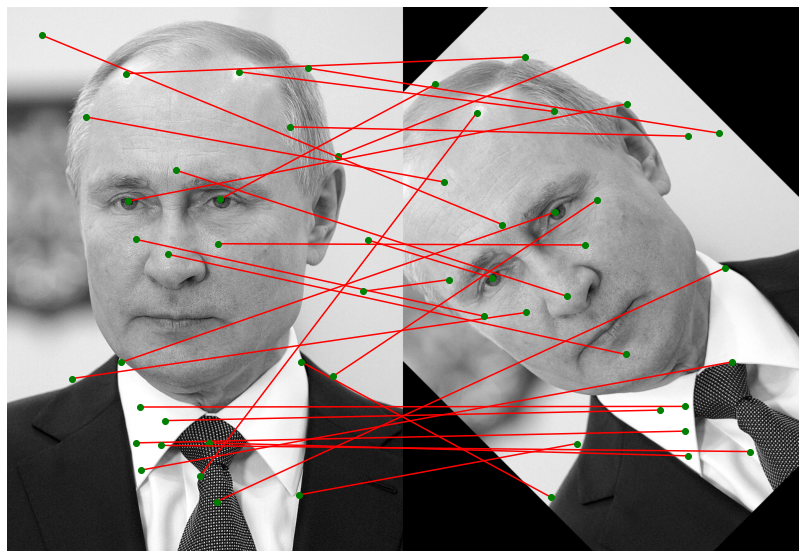

In [31]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 10))

ax.imshow(np.hstack((img1_gray, img1_rot)), cmap='gray')
ax.axis('off')

# Recorremos todas las coincidencias entre los keypoints de las dos imágenes
for i, match in enumerate(matches):
    # En cada iteracion obtenemos los indices de los keypoints emparejados en cada imagen
    idx1 = match[0]
    idx2 = match[1]

    # Dibujamos una línea que conecta los keypoints emparejados entre las dos imágenes
    ax.plot((brief_keypoints[idx1][1], brief_keypoints_rot[idx2][1] + img1_gray.shape[1]),
            (brief_keypoints[idx1][0], brief_keypoints_rot[idx2][0]), 'r')

    # Dibujamos puntos en los keypoints de cada imagen
    ax.plot(brief_keypoints[idx1][1], brief_keypoints[idx1][0], 'go')
    ax.plot(brief_keypoints_rot[idx2][1] + img1_gray.shape[1], brief_keypoints_rot[idx2][0], 'go')

plt.show()

In [6]:
modelo2 = SIFT(upsampling=1)

modelo2.detect_and_extract(img1_gray)
sift_keypoints = modelo2.keypoints
sift_descriptors = modelo2.descriptors

modelo2.detect_and_extract(img1_rot)
sift_keypoints_rot = modelo2.keypoints
sift_descriptors_rot = modelo2.descriptors

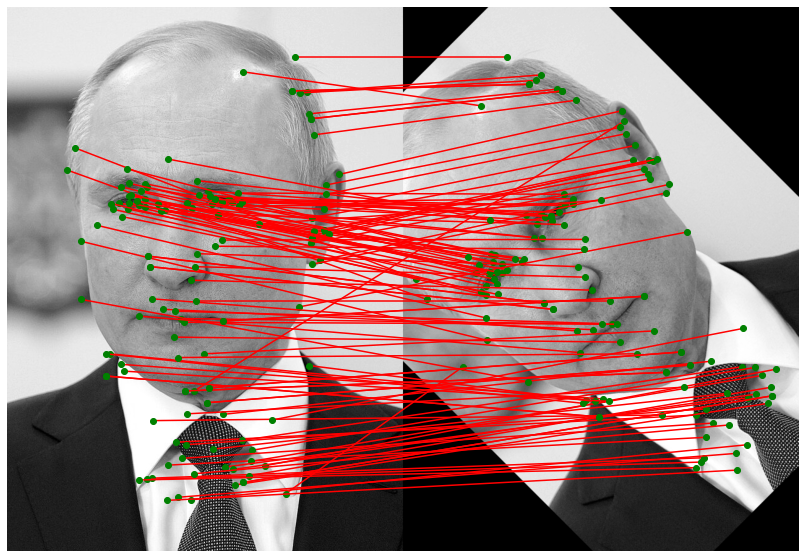

In [33]:
matches_sift = match_descriptors(sift_descriptors, sift_descriptors_rot, cross_check=True)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 10))

ax.imshow(np.hstack((img1_gray, img1_rot)), cmap='gray')
ax.axis('off')

for i, match in enumerate(matches_sift):
    idx1 = match[0]
    idx2 = match[1]

    ax.plot((sift_keypoints[idx1][1], sift_keypoints_rot[idx2][1] + img1_gray.shape[1]),
            (sift_keypoints[idx1][0], sift_keypoints_rot[idx2][0]), 'r')

    ax.plot(sift_keypoints[idx1][1], sift_keypoints[idx1][0], 'go')
    ax.plot(sift_keypoints_rot[idx2][1] + img1_gray.shape[1], sift_keypoints_rot[idx2][0], 'go')

plt.show()

In [40]:
modelo3 = ORB(n_keypoints=500)

modelo3.detect_and_extract(img1_gray)
orb_keypoints = modelo3.keypoints
orb_descriptors = modelo3.descriptors

modelo3.detect_and_extract(img1_rot)
orb_keypoints_rot = modelo3.keypoints
orb_descriptors_rot = modelo3.descriptors

matches_orb = match_descriptors(orb_descriptors, orb_descriptors_rot, cross_check=True)

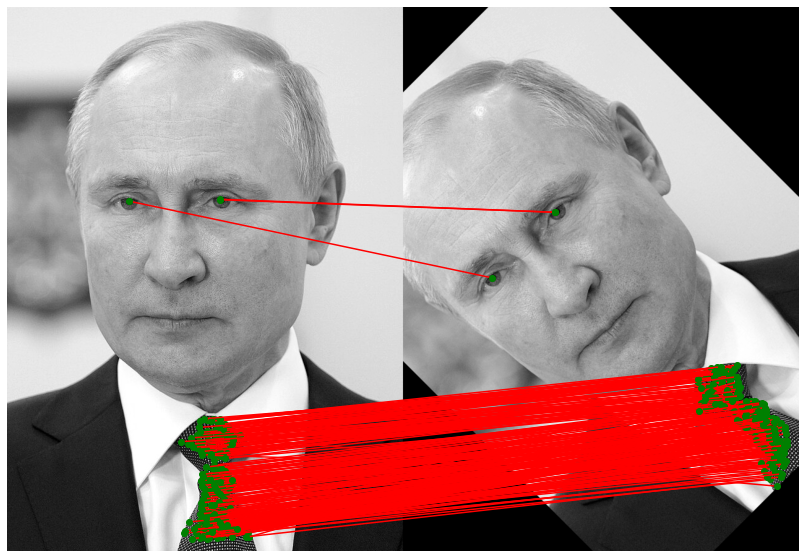

In [41]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 10))

ax.imshow(np.hstack((img1_gray, img1_rot)), cmap='gray')
ax.axis('off')

for i, match in enumerate(matches_orb):
    idx1 = match[0]
    idx2 = match[1]

    ax.plot((orb_keypoints[idx1][1], orb_keypoints_rot[idx2][1] + img1_gray.shape[1]),
            (orb_keypoints[idx1][0], orb_keypoints_rot[idx2][0]), 'r')

    ax.plot(orb_keypoints[idx1][1], orb_keypoints[idx1][0], 'go')
    ax.plot(orb_keypoints_rot[idx2][1] + img1_gray.shape[1], orb_keypoints_rot[idx2][0], 'go')

plt.show()

In [10]:
img2 = plt.imread('persona2.jpeg')
img2_gray = color.rgb2gray(img2)
img2_rot = rotate(img2_gray, 45)

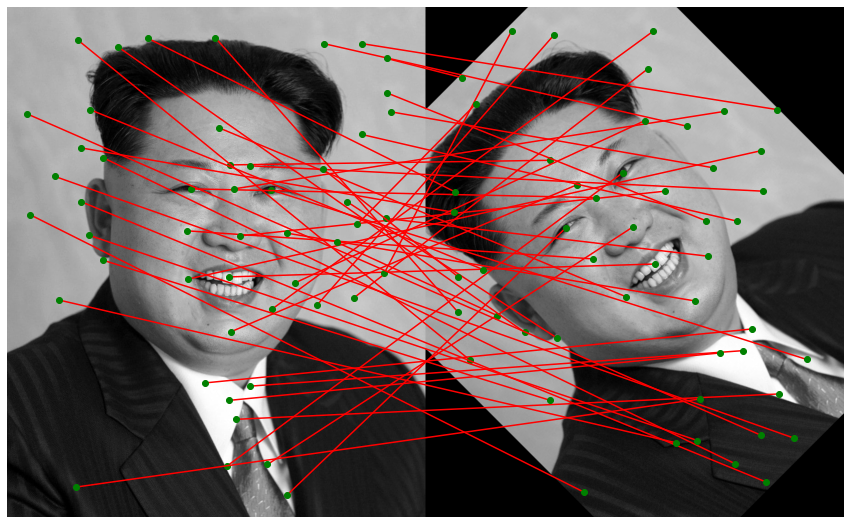

In [44]:
brief_keypoints2 = peak.peak_local_max(img2_gray, min_distance=40)
brief_keypoints_rot2 = peak.peak_local_max(img2_rot, min_distance=40)

modelo.extract(img2_gray, brief_keypoints2)
modelo.extract(img2_rot, brief_keypoints_rot2)

matches2 = match_descriptors(modelo.descriptors, modelo.descriptors, cross_check=True)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 10))

ax.imshow(np.hstack((img2_gray, img2_rot)), cmap='gray')
ax.axis('off')

for i, match in enumerate(matches2):
    idx1 = match[0]
    idx2 = match[1]

    ax.plot((brief_keypoints2[idx1][1], brief_keypoints_rot2[idx2][1] + img2_gray.shape[1]),
            (brief_keypoints2[idx1][0], brief_keypoints_rot2[idx2][0]), 'r')

    ax.plot(brief_keypoints2[idx1][1], brief_keypoints2[idx1][0], 'go')
    ax.plot(brief_keypoints_rot2[idx2][1] + img2_gray.shape[1], brief_keypoints_rot2[idx2][0], 'go')

plt.show()

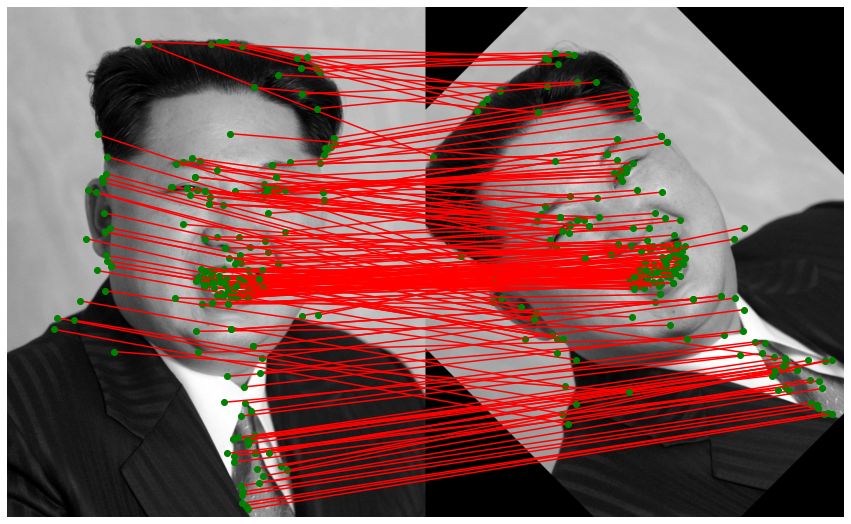

In [45]:
modelo2.detect_and_extract(img2_gray)
sift_keypoints2 = modelo2.keypoints
sift_descriptors2 = modelo2.descriptors

modelo2.detect_and_extract(img2_rot)
sift_keypoints_rot2 = modelo2.keypoints
sift_descriptors_rot2 = modelo2.descriptors

matches_sift2 = match_descriptors(sift_descriptors2, sift_descriptors_rot2, cross_check=True)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 10))

ax.imshow(np.hstack((img2_gray, img2_rot)), cmap='gray')
ax.axis('off')

for i, match in enumerate(matches_sift2):
    idx1 = match[0]
    idx2 = match[1]

    ax.plot((sift_keypoints2[idx1][1], sift_keypoints_rot2[idx2][1] + img2_gray.shape[1]),
            (sift_keypoints2[idx1][0], sift_keypoints_rot2[idx2][0]), 'r')

    ax.plot(sift_keypoints2[idx1][1], sift_keypoints2[idx1][0], 'go')
    ax.plot(sift_keypoints_rot2[idx2][1] + img2_gray.shape[1], sift_keypoints_rot2[idx2][0], 'go')

plt.show()

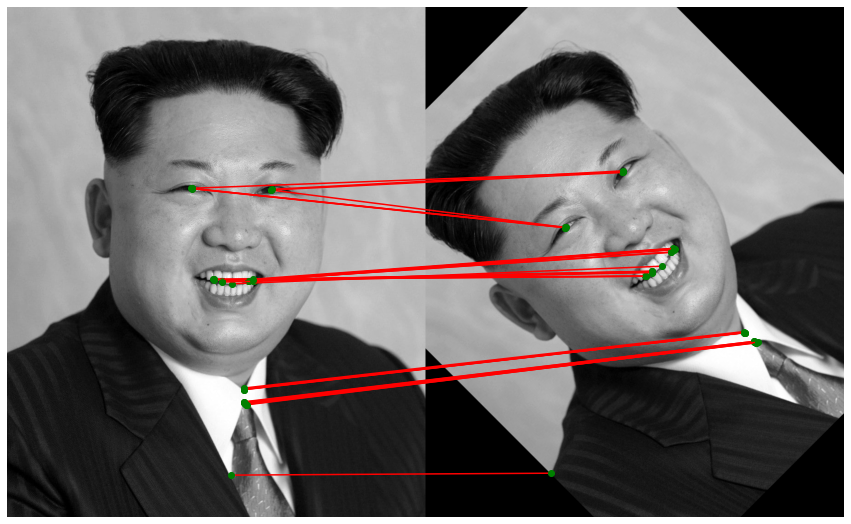

In [11]:
modelo3 = ORB(n_keypoints=50)

modelo3.detect_and_extract(img2_gray)
orb_keypoints2 = modelo3.keypoints
orb_descriptors2 = modelo3.descriptors

modelo3.detect_and_extract(img2_rot)
orb_keypoints_rot2 = modelo3.keypoints
orb_descriptors_rot2 = modelo3.descriptors

matches_orb2 = match_descriptors(orb_descriptors2, orb_descriptors_rot2, cross_check=True)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 10))

ax.imshow(np.hstack((img2_gray, img2_rot)), cmap='gray')
ax.axis('off')

for i, match in enumerate(matches_orb2):
    idx1 = match[0]
    idx2 = match[1]

    ax.plot((orb_keypoints2[idx1][1], orb_keypoints_rot2[idx2][1] + img2_gray.shape[1]),
            (orb_keypoints2[idx1][0], orb_keypoints_rot2[idx2][0]), 'r')

    ax.plot(orb_keypoints2[idx1][1], orb_keypoints2[idx1][0], 'go')
    ax.plot(orb_keypoints_rot2[idx2][1] + img2_gray.shape[1], orb_keypoints_rot2[idx2][0], 'go')

plt.show()

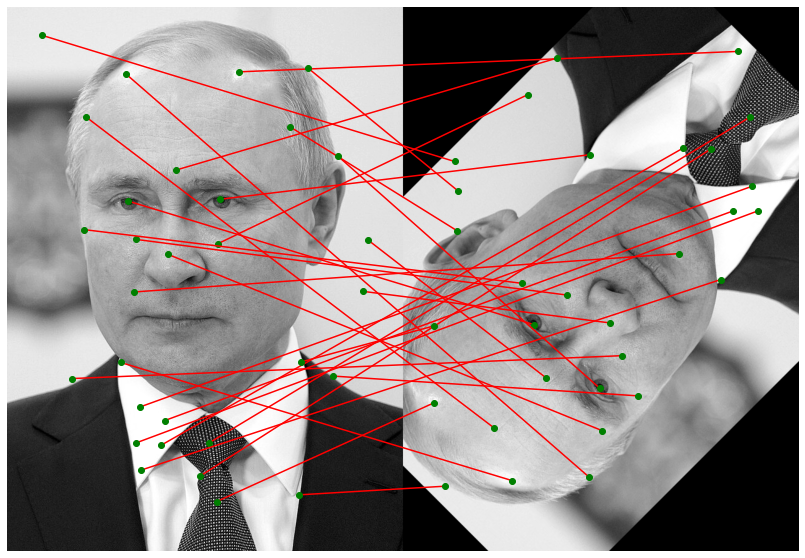

In [5]:
img1_rot2 = rotate(img1_gray, 135)

brief_keypoints3 = peak.peak_local_max(img1_gray, min_distance=40)
brief_keypoints_rot3 = peak.peak_local_max(img1_rot2, min_distance=40)

modelo.extract(img1_gray, brief_keypoints3)
modelo.extract(img1_rot2, brief_keypoints_rot3)

matches3 = match_descriptors(modelo.descriptors, modelo.descriptors, cross_check=True)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 10))

ax.imshow(np.hstack((img1_gray, img1_rot2)), cmap='gray')
ax.axis('off')

for i, match in enumerate(matches3):
    idx1 = match[0]
    idx2 = match[1]

    ax.plot((brief_keypoints3[idx1][1], brief_keypoints_rot3[idx2][1] + img1_gray.shape[1]),
            (brief_keypoints3[idx1][0], brief_keypoints_rot3[idx2][0]), 'r')

    ax.plot(brief_keypoints3[idx1][1], brief_keypoints3[idx1][0], 'go')
    ax.plot(brief_keypoints_rot3[idx2][1] + img1_gray.shape[1], brief_keypoints_rot3[idx2][0], 'go')

plt.show()

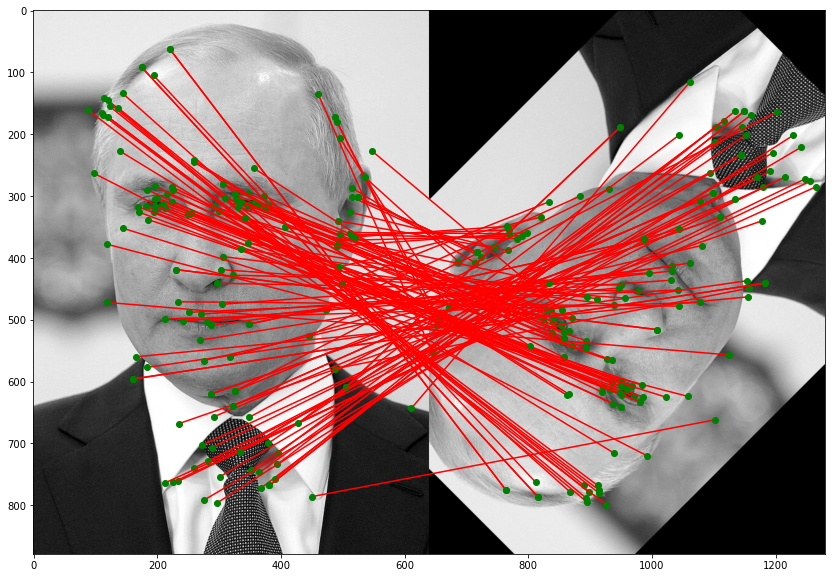

In [7]:
modelo2.detect_and_extract(img1_gray)
sift_keypoints3 = modelo2.keypoints
sift_descriptors3 = modelo2.descriptors

modelo2.detect_and_extract(img1_rot2)
sift_keypoints_rot3 = modelo2.keypoints
sift_descriptors_rot3 = modelo2.descriptors

matches_sift3 = match_descriptors(sift_descriptors3, sift_descriptors_rot3, cross_check=True)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 10))

ax.imshow(np.hstack((img1_gray, img1_rot2)), cmap='gray')

for i, match in enumerate(matches_sift3):
    idx1 = match[0]
    idx2 = match[1]

    ax.plot((sift_keypoints3[idx1][1], sift_keypoints_rot3[idx2][1] + img1_gray.shape[1]),
            (sift_keypoints3[idx1][0], sift_keypoints_rot3[idx2][0]), 'r')

    ax.plot(sift_keypoints3[idx1][1], sift_keypoints3[idx1][0], 'go')
    ax.plot(sift_keypoints_rot3[idx2][1] + img1_gray.shape[1], sift_keypoints_rot3[idx2][0], 'go')

plt.show()

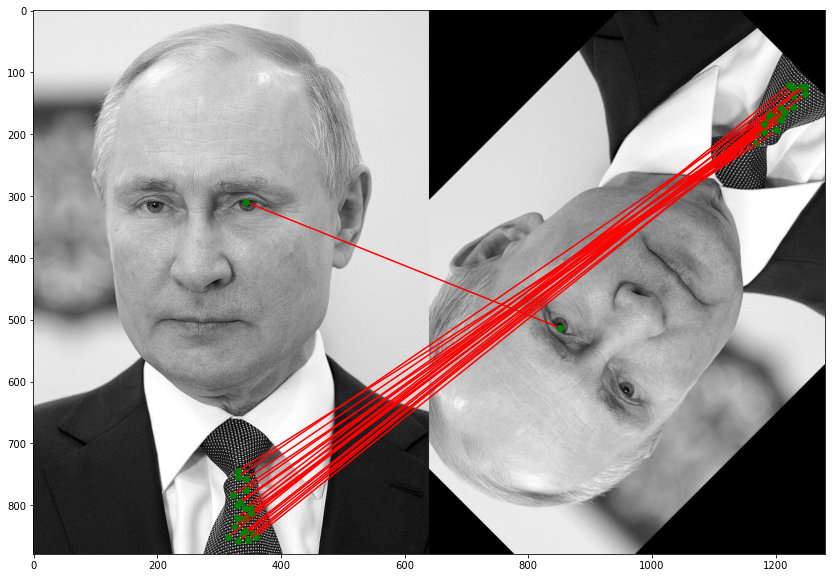

In [12]:
modelo3.detect_and_extract(img1_gray)
orb_keypoints3 = modelo3.keypoints
orb_descriptors3 = modelo3.descriptors

modelo3.detect_and_extract(img1_rot2)
orb_keypoints_rot3 = modelo3.keypoints
orb_descriptors_rot3 = modelo3.descriptors

matches_orb3 = match_descriptors(orb_descriptors3, orb_descriptors_rot3, cross_check=True)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 10))
ax.imshow(np.hstack((img1_gray, img1_rot2)), cmap='gray')

for i, match in enumerate(matches_orb3):
    idx1 = match[0]
    idx2 = match[1]

    ax.plot((orb_keypoints3[idx1][1], orb_keypoints_rot3[idx2][1] + img1_gray.shape[1]),
            (orb_keypoints3[idx1][0], orb_keypoints_rot3[idx2][0]), 'r')

    ax.plot(orb_keypoints3[idx1][1], orb_keypoints3[idx1][0], 'go')
    ax.plot(orb_keypoints_rot3[idx2][1] + img1_gray.shape[1], orb_keypoints_rot3[idx2][0], 'go')

plt.show()